In [5]:
import pandas as pd
file_path = '/kaggle/input/failure-csv/failure.csv'
df = pd.read_csv(file_path)

df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [6]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
missing_values = df.isnull().sum()

In [9]:
missing_values.sum()

0

In [10]:
df.duplicated().sum()

0

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

<Axes: xlabel='failure'>

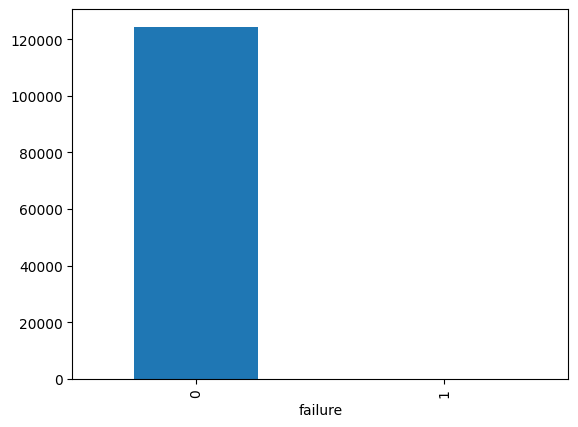

In [12]:
df.failure.value_counts().plot(kind='bar')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         124494 non-null  datetime64[ns]
 1   device       124494 non-null  object        
 2   failure      124494 non-null  int64         
 3   attribute1   124494 non-null  int64         
 4   attribute2   124494 non-null  int64         
 5   attribute3   124494 non-null  int64         
 6   attribute4   124494 non-null  int64         
 7   attribute5   124494 non-null  int64         
 8   attribute6   124494 non-null  int64         
 9   attribute7   124494 non-null  int64         
 10  attribute8   124494 non-null  int64         
 11  attribute9   124494 non-null  int64         
 12  month        124494 non-null  int32         
 13  day          124494 non-null  int32         
 14  day_of_week  124494 non-null  int32         
dtypes: datetime64[ns](1), int32(3), in

In [14]:
del df['date']
del df['device']

In [15]:
df['month'] = df['month'].astype('category')
df['day'] = df['day'].astype('category')
df['day_of_week'] = df['day_of_week'].astype('category')

In [16]:
df = pd.get_dummies(df)

In [17]:
int64_cols = df.select_dtypes(include='int64').columns
df[int64_cols] = df[int64_cols].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 59 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   failure        124494 non-null  int32
 1   attribute1     124494 non-null  int32
 2   attribute2     124494 non-null  int32
 3   attribute3     124494 non-null  int32
 4   attribute4     124494 non-null  int32
 5   attribute5     124494 non-null  int32
 6   attribute6     124494 non-null  int32
 7   attribute7     124494 non-null  int32
 8   attribute8     124494 non-null  int32
 9   attribute9     124494 non-null  int32
 10  month_1        124494 non-null  bool 
 11  month_2        124494 non-null  bool 
 12  month_3        124494 non-null  bool 
 13  month_4        124494 non-null  bool 
 14  month_5        124494 non-null  bool 
 15  month_6        124494 non-null  bool 
 16  month_7        124494 non-null  bool 
 17  month_8        124494 non-null  bool 
 18  month_9        124494 no

<Axes: xlabel='failure'>

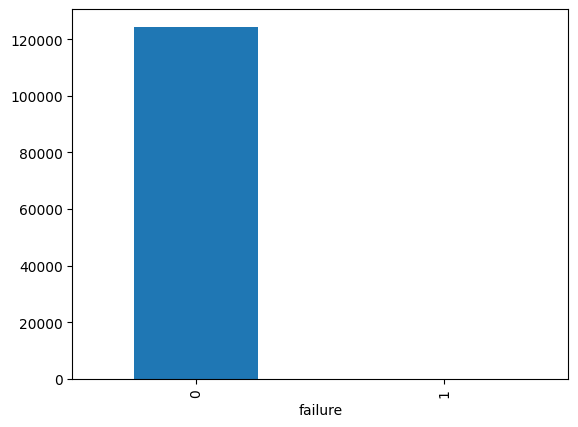

In [18]:
df.failure.value_counts().plot(kind='bar')

In [19]:
X = df.drop(columns=['failure'])
y = df['failure']

In [20]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

print("SMOTE Sonrası Dağılım:", pd.Series(y_resampled).value_counts())

SMOTE Sonrası Dağılım: failure
0    124388
1    124388
Name: count, dtype: int64


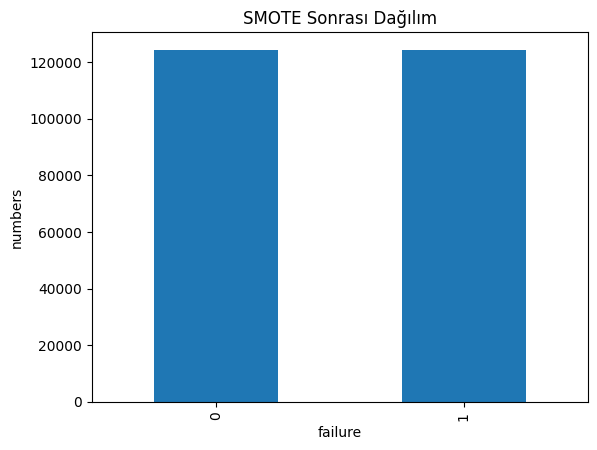

In [21]:
import matplotlib.pyplot as plt
pd.Series(y_resampled).value_counts().plot(kind='bar', title='SMOTE Sonrası Dağılım')
plt.xlabel('failure')
plt.ylabel('numbers')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Doğruluk:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("\nKarışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))

Doğruluk: 0.9998191172923868
ROC-AUC: 0.9999987873627356

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24752
           1       1.00      1.00      1.00     25004

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756


Karışıklık Matrisi:
 [[24752     0]
 [    9 24995]]


In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("En İyi Parametreler:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("En İyi Model Doğruluğu:", accuracy_score(y_test, y_pred_best))
print("En İyi Model ROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))
print("\nEn İyi Model Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_best))
print("\nEn İyi Model Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
En İyi Parametreler: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
En İyi Model Doğruluğu: 0.9997789211351394
En İyi Model ROC-AUC: 0.9999988875406308

En İyi Model Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     24752
           1       1.00      1.00      1.00     25004

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756


En İyi Model Karışıklık Matrisi:
 [[24752     0]
 [   11 24993]]
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.1min
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.0min
[CV] END bootstrap=False, max_depth=20, min_samples_leaf